In [1]:
!nvidia-smi

Wed Jun 18 06:29:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   37C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

First, install ultralytics

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 41.5/235.7 GB disk)


Then, install and connect logger

In [3]:
%pip install clearml
import clearml

clearml.browser_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.5 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

ClearML automatic browser login failed, please login or create a new account
To get started with ClearML: setup your own `clearml-server`, or create a free account at https://app.clear.ml

Please login to https://app.clear.ml , then press [Enter] to connect 


<IPython.core.display.Javascript object>


We cannot connect automatically (adblocker / incognito?) 😟 
Please go to https://app.clear.ml/settings/workspace-configuration 
Then press  + Create new credentials  
And copy/paste your Access Key here: BGWJTVTWCY0UJBVIC8LVKV36F4V1ES
 Setting access key 
Now copy/paste your Secret Key here: 5sud05AcymT3lFnFpvA0sLQTBCbfYzSiCdTPNO8rXUqprjyWPhLntQtRTqV5iLbQmRs
 Setting secret key 


Hurrah! 🥳 🎊 🎉
🤖 ClearML connected successfully - let's build something! 🚀


Next, connect google drive:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now, let's load a model:

In [5]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolo11n.yaml')  # build a new model from scratch
model = YOLO('yolo11n.pt')  # load a pretrained model (recommended for training)

100%|██████████| 5.35M/5.35M [00:00<00:00, 263MB/s]


Configure and launch training:

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=None, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/unitsol/datasets/yolo/usol_symbols_v0.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.0, exist_ok=False, fliplr=1.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.3, hsv_v=0.2, imgsz=2560, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True,

100%|██████████| 755k/755k [00:00<00:00, 122MB/s]

Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

YOLO11n summary: 181 layers, 2,592,375 parameters, 2,592,359 gradients, 6.5 GFLOPs

Transferred 448/499 items from pretrained weights
ClearML Task: created new task id=a5e84d6f9aeb46cdb31188f31bce8de7
ClearML results page: https://app.clear.ml/projects/47acdbaab0d5404ba74d34c22ee392a4/experiments/a5e84d6f9aeb46cdb31188f31bce8de7/output/log
WARNING ⚠️ ClearML Initialized a new task. If you want to run remotely, please add clearml-init and connect your arguments before initializing YOLO.
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.9±0.2 MB/s, size: 808.3 KB)


train: Scanning /content/drive/MyDrive/unitsol/datasets/yolo/labels/train.cache... 422 images, 0 backgrounds, 0 corrupt: 100%|██████████| 422/422 [00:00<?, ?it/s]

train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/124948-2_1.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61426603_1.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61426703_1.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61426703_2.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61426703_3.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61426703_4.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61526401_1.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61626302_1.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-6192620

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=2560 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (NVIDIA L4) 22.16G total, 0.11G reserved, 0.05G allocated, 22.00G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2592375       103.3         4.326         57.49         280.8      (1, 3, 2560, 2560)                    list
     2592375       206.5         8.443          76.6         185.4      (2, 3, 2560, 2560)                    list
     2592375         413        16.639         155.6           313      (4, 3, 2560, 2560)                    list
     2592375         826        25.550           332         725.3      (8, 3, 2560, 2560)                    list
CUDA out of memory. Tried to allo

train: Scanning /content/drive/MyDrive/unitsol/datasets/yolo/labels/train.cache... 422 images, 0 backgrounds, 0 corrupt: 100%|██████████| 422/422 [00:00<?, ?it/s]

train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/124948-2_1.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61426603_1.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61426703_1.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61426703_2.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61426703_3.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61426703_4.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61526401_1.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-61626302_1.jpg: corrupt JPEG restored and saved
train: /content/drive/MyDrive/unitsol/datasets/yolo/images/train/BL-6192620

val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.9±0.3 MB/s, size: 1028.0 KB)


val: Scanning /content/drive/MyDrive/unitsol/datasets/yolo/labels/val.cache... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<?, ?it/s]

val: /content/drive/MyDrive/unitsol/datasets/yolo/images/val/BL-61526301_1.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/unitsol/datasets/yolo/images/val/BL-61926201_1.jpg: corrupt JPEG restored and saved
val: /content/drive/MyDrive/unitsol/datasets/yolo/images/val/BL-61926307_3.jpg: corrupt JPEG restored and saved


Plotting labels to unitsol_symbols_v0/run4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0004921875), 87 bias(decay=0.0)
Image sizes 2560 train, 2560 val
Using 8 dataloader workers
Logging results to unitsol_symbols_v0/run4
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150       9.1G     0.7977      6.343     0.9326          7       2560: 100%|██████████| 141/141 [00:56<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:08<00:00,  1.47it/s]

                   all         71        523      0.458      0.102     0.0868     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       9.1G     0.6219      4.823     0.8572         22       2560: 100%|██████████| 141/141 [00:53<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.03it/s]


                   all         71        523        0.2       0.26      0.162      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       9.1G      0.605      4.238     0.8448         50       2560:  16%|█▋        | 23/141 [00:09<00:47,  2.46it/s]

ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


      3/150       9.1G     0.5847       4.11     0.8475          6       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]

                   all         71        523      0.249      0.305      0.237       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150       9.1G     0.5727      3.555     0.8537         26       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all         71        523       0.36       0.36      0.331      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       9.1G     0.5474      3.139     0.8343         14       2560: 100%|██████████| 141/141 [00:53<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]

                   all         71        523      0.513        0.4      0.425      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150       9.1G     0.5318      2.687     0.8424         32       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all         71        523      0.732      0.408      0.519      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150       9.1G     0.5172      2.665     0.8386          8       2560: 100%|██████████| 141/141 [00:53<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all         71        523      0.758      0.501      0.578      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      9.12G      0.498      2.489     0.8378         52       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all         71        523      0.707      0.487      0.581      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      9.13G     0.5141      2.258      0.834         29       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]

                   all         71        523      0.761      0.536      0.599      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      9.15G     0.4757      2.118     0.8295         33       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all         71        523      0.686      0.535       0.61      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      9.15G     0.4952      1.872     0.8276         19       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]

                   all         71        523      0.735      0.565      0.635      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      9.15G     0.4532      1.942     0.8167         44       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.34it/s]

                   all         71        523      0.731      0.568      0.633      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      9.15G     0.4753      1.797     0.8278          4       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all         71        523      0.814      0.616       0.69      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      9.16G      0.455       1.65     0.8237         16       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all         71        523       0.83      0.614      0.701      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      9.18G     0.4683      1.532     0.8223         18       2560: 100%|██████████| 141/141 [00:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]

                   all         71        523      0.781      0.612      0.681      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      9.18G      0.448      1.403     0.8132         30       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]

                   all         71        523      0.801      0.651      0.718      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      9.18G     0.4523      1.389     0.8145         25       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all         71        523      0.869       0.59      0.701      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      9.18G     0.4294       1.26     0.8149         27       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all         71        523      0.839      0.593      0.704      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      9.18G     0.4285      1.203     0.8136         25       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.38it/s]

                   all         71        523      0.848      0.617      0.726       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      9.18G     0.4269      1.199     0.8142         25       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]

                   all         71        523       0.84      0.623      0.732      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      9.18G     0.4089      1.103      0.812         33       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.31it/s]

                   all         71        523      0.846      0.658       0.74      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      9.18G     0.4253      1.116     0.8041          5       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all         71        523      0.843      0.649      0.727       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      9.18G      0.417      1.029     0.8058         12       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]

                   all         71        523      0.869      0.618      0.728       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      9.18G     0.4158     0.9742     0.8021          8       2560: 100%|██████████| 141/141 [00:54<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all         71        523      0.816      0.628      0.712       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      9.18G     0.4104     0.9099     0.8083         33       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all         71        523      0.796      0.668      0.737      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      9.18G     0.4255     0.9864     0.8188         17       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523      0.773      0.648      0.713      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      9.18G     0.4059     0.8915     0.8098         16       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all         71        523      0.818      0.679      0.728      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      9.18G     0.3871      0.828     0.7974         72       2560: 100%|██████████| 141/141 [00:53<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all         71        523      0.822      0.636      0.728      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      9.18G     0.3972     0.8072     0.7998         13       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all         71        523      0.807      0.681      0.749        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      9.18G      0.416     0.8065     0.8124         41       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all         71        523      0.887      0.665      0.751      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      9.18G     0.4024     0.7593     0.8155         13       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all         71        523      0.849      0.673      0.742      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      9.18G     0.4035     0.7891     0.8083          6       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all         71        523      0.834      0.693      0.748      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      9.18G     0.3949     0.7388     0.8096         15       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all         71        523      0.804      0.667      0.744       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      9.18G      0.394     0.7059     0.8061         10       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all         71        523      0.719      0.706      0.736      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      9.18G     0.3837     0.6805      0.799         21       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]

                   all         71        523      0.901      0.635      0.745        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      9.18G     0.3965     0.6558     0.8051         15       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all         71        523      0.799      0.689      0.771      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      9.18G     0.3895     0.6565     0.7929          9       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all         71        523      0.774      0.701      0.762      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      9.18G     0.3913     0.6372     0.8064         37       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all         71        523      0.884      0.668       0.77      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      9.18G     0.3826     0.6243     0.8052         12       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all         71        523      0.771      0.688      0.757      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      9.18G      0.386     0.6071     0.7963         17       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all         71        523      0.931      0.649      0.755      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      9.18G     0.3851      0.615     0.7981         10       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all         71        523      0.822      0.695      0.776      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      9.18G     0.3823     0.5934     0.8007         18       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]

                   all         71        523       0.74      0.678      0.738      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      9.18G     0.3825     0.5949     0.8012         12       2560: 100%|██████████| 141/141 [00:53<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all         71        523      0.921      0.691      0.791       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      9.18G     0.3698     0.5651     0.8002         21       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all         71        523      0.857      0.705      0.768      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      9.18G     0.3917      0.559     0.8036         18       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all         71        523      0.852      0.686      0.753      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      9.18G     0.3725     0.5365     0.7991         38       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all         71        523      0.843      0.687      0.756      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      9.18G     0.3674     0.5236      0.794         29       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]

                   all         71        523      0.797      0.661      0.749      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      9.18G     0.3814     0.5372     0.7962         16       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all         71        523      0.741      0.695      0.748      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      9.18G     0.3673     0.5098     0.8017          8       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523       0.78      0.646      0.728      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      9.18G     0.3875      0.504     0.8093         28       2560: 100%|██████████| 141/141 [00:53<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all         71        523      0.736      0.658      0.732      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      9.18G     0.3993     0.4996     0.8075         18       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.40it/s]

                   all         71        523      0.769      0.673      0.756      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      9.18G     0.3634     0.5056     0.7927          8       2560: 100%|██████████| 141/141 [00:53<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all         71        523       0.83      0.686      0.761      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      9.18G     0.3715     0.4737     0.8045         15       2560: 100%|██████████| 141/141 [00:54<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all         71        523      0.745      0.685      0.754      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      9.18G     0.3554     0.4609      0.795         19       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all         71        523      0.853      0.692      0.761      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      9.18G     0.3713     0.4732     0.8058         14       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all         71        523      0.726      0.681      0.743      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      9.18G     0.3619      0.451     0.7958         62       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all         71        523      0.905      0.647      0.756      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      9.18G      0.376     0.4504     0.7929         34       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.58it/s]

                   all         71        523      0.879      0.663      0.771      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      9.18G     0.3611     0.4432      0.797         21       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all         71        523      0.794      0.674      0.754      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      9.18G     0.3655     0.4411     0.7944         34       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]

                   all         71        523      0.752      0.669      0.741      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      9.18G     0.3616     0.4612     0.8001         24       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all         71        523      0.814      0.657      0.781      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      9.18G     0.3554     0.4238     0.7935         38       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all         71        523      0.774      0.688      0.769      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      9.18G     0.3548     0.4181     0.7886         44       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all         71        523      0.778      0.676      0.769      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      9.18G     0.3402     0.4143     0.7931         16       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]

                   all         71        523      0.778      0.718      0.786      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      9.18G     0.3375     0.3962     0.7946         52       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all         71        523      0.795      0.733      0.801       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      9.18G     0.3518      0.417     0.7941         14       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.37it/s]

                   all         71        523      0.779      0.799      0.812      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      9.18G     0.3657     0.4109     0.7967         14       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]

                   all         71        523      0.745      0.797      0.778      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      9.18G     0.3482     0.3968     0.7891         23       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all         71        523      0.782       0.71      0.777      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      9.18G     0.3527      0.407     0.7927         23       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all         71        523      0.798      0.704      0.781      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      9.18G     0.3464     0.3906      0.793         55       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]

                   all         71        523      0.761       0.77       0.79      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      9.18G     0.3403     0.3881     0.7862         36       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all         71        523      0.777      0.764       0.76      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      9.18G     0.3329     0.3725     0.7906          7       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all         71        523      0.742      0.831      0.791      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      9.18G     0.3626     0.3829     0.7937         42       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]

                   all         71        523      0.742      0.798      0.784      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      9.18G     0.3625     0.4007      0.797         39       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.59it/s]

                   all         71        523      0.744      0.782      0.784       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      9.18G     0.3511      0.382     0.7954         31       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all         71        523      0.787      0.774      0.797      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      9.18G     0.3308     0.3689     0.7865         21       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all         71        523      0.806      0.773      0.795      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      9.18G     0.3565     0.3771     0.7958         23       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all         71        523      0.845      0.728      0.791      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      9.18G     0.3399     0.3663     0.7868         24       2560: 100%|██████████| 141/141 [00:54<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]

                   all         71        523      0.845      0.743      0.846      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      9.18G     0.3585     0.3735      0.795         19       2560: 100%|██████████| 141/141 [00:53<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]

                   all         71        523      0.897      0.769      0.862      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      9.18G     0.3492      0.361     0.7932          5       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all         71        523      0.821      0.782      0.814      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      9.18G     0.3353     0.3565     0.7955         23       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all         71        523      0.737      0.792      0.784      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      9.18G     0.3412     0.3654      0.789         19       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all         71        523      0.805      0.727      0.792      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      9.18G     0.3406     0.3633     0.7897         34       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all         71        523      0.723      0.726      0.743      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      9.18G     0.3474      0.358     0.7907         38       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all         71        523      0.781      0.769      0.786      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      9.18G     0.3366     0.3435     0.7887         22       2560: 100%|██████████| 141/141 [00:55<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all         71        523       0.79      0.773      0.791      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      9.18G       0.35      0.343     0.7936         12       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]

                   all         71        523      0.847      0.746      0.857      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      9.18G     0.3235     0.3373     0.7906          9       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.58it/s]

                   all         71        523      0.849      0.716       0.81      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      9.18G     0.3453     0.3556     0.7898         29       2560: 100%|██████████| 141/141 [00:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.34it/s]

                   all         71        523      0.864        0.7      0.813      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      9.18G     0.3366      0.356     0.7848         15       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]

                   all         71        523      0.903      0.731      0.847      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      9.18G     0.3359     0.3354      0.791         18       2560: 100%|██████████| 141/141 [00:55<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all         71        523      0.871      0.749      0.845       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      9.18G     0.3501     0.3479     0.7916         12       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all         71        523      0.816       0.77       0.79      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      9.18G      0.338     0.3485     0.7855         32       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523      0.819       0.74      0.768      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      9.18G     0.3402     0.3462      0.792         24       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]

                   all         71        523      0.786      0.805       0.86      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      9.18G     0.3343     0.3365     0.7876          8       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.58it/s]

                   all         71        523      0.907      0.747      0.855      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      9.18G     0.3146     0.3216     0.7836         16       2560: 100%|██████████| 141/141 [00:55<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523      0.841      0.785       0.85      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      9.18G     0.3387     0.3266     0.7955          9       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all         71        523      0.848      0.749      0.843      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      9.18G     0.3265     0.3272     0.7899         35       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all         71        523      0.823      0.759      0.813       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      9.18G     0.3245     0.3159     0.7898         44       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all         71        523      0.874       0.72       0.85      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      9.18G     0.3257     0.3231     0.7888         25       2560: 100%|██████████| 141/141 [00:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523      0.829      0.758       0.84      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      9.18G     0.3425     0.3307      0.792         22       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.40it/s]

                   all         71        523      0.829      0.803      0.855      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      9.18G     0.3189     0.3206     0.7873         25       2560: 100%|██████████| 141/141 [00:55<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all         71        523      0.779      0.796      0.809      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      9.18G     0.3281     0.3157     0.7925         35       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all         71        523      0.818      0.739      0.818      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      9.18G     0.3163     0.3123     0.7813         21       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all         71        523      0.834      0.797      0.868      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      9.18G     0.3217     0.3138     0.7891         30       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]

                   all         71        523      0.811      0.751      0.802      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      9.18G     0.3331     0.3176     0.7925         20       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all         71        523      0.822      0.724      0.793      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      9.18G     0.3076     0.3013     0.7887         14       2560: 100%|██████████| 141/141 [00:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523      0.819      0.746      0.834      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      9.18G     0.3397      0.321     0.7877          6       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523      0.849      0.733      0.826       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      9.18G     0.3157      0.307     0.7822         13       2560: 100%|██████████| 141/141 [00:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all         71        523      0.793      0.763      0.795      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      9.18G     0.3289     0.3115     0.7837         22       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523      0.778      0.709      0.789      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      9.18G     0.3121     0.2985     0.7823         33       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all         71        523      0.788      0.783      0.794      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      9.18G     0.3181     0.2982     0.7888         38       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]

                   all         71        523      0.839      0.779      0.862      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      9.18G     0.3237     0.3068      0.785         23       2560: 100%|██████████| 141/141 [00:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all         71        523      0.776      0.781      0.784      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      9.18G     0.3115     0.3041     0.7887         19       2560: 100%|██████████| 141/141 [00:55<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.34it/s]

                   all         71        523       0.83      0.699      0.789      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      9.18G     0.3309     0.3071     0.7918         40       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all         71        523      0.789      0.808      0.804      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      9.18G     0.3314     0.3093     0.7873         19       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all         71        523      0.856      0.737      0.807      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      9.18G     0.3078      0.288     0.7819         25       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all         71        523      0.942      0.698      0.849      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      9.18G     0.3074     0.2939     0.7832         46       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all         71        523      0.876      0.742      0.844       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      9.18G     0.3186     0.2918     0.7857         21       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]

                   all         71        523      0.892      0.734      0.854      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      9.18G     0.3196     0.2972     0.7851         28       2560: 100%|██████████| 141/141 [00:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all         71        523      0.812      0.781      0.815      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      9.18G     0.3124     0.2939     0.7814         21       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all         71        523      0.814      0.769       0.81      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      9.18G     0.3074     0.2873     0.7825         19       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all         71        523      0.799      0.777      0.802      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      9.18G     0.3138     0.2883      0.784         47       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all         71        523      0.878      0.736       0.82       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      9.18G     0.3019     0.2794     0.7847         18       2560: 100%|██████████| 141/141 [00:54<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all         71        523      0.877       0.76      0.811      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      9.18G      0.305     0.2793     0.7828         15       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]

                   all         71        523       0.83      0.771        0.8      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      9.18G     0.3102     0.2876     0.7853         16       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]

                   all         71        523      0.767      0.782      0.793      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      9.18G     0.3004     0.2753     0.7834         29       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]

                   all         71        523      0.786      0.777      0.799      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      9.18G     0.2996     0.2745     0.7838         15       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523      0.808      0.762      0.788      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      9.18G     0.3018     0.2754      0.785          9       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all         71        523      0.828      0.757      0.797      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      9.18G     0.3159     0.2805     0.7846         31       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all         71        523      0.863      0.764      0.806      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      9.18G     0.3044     0.2757     0.7823         14       2560: 100%|██████████| 141/141 [00:55<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all         71        523      0.849      0.768      0.812      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      9.18G     0.3039     0.2756     0.7807         13       2560: 100%|██████████| 141/141 [00:54<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]

                   all         71        523      0.899      0.739      0.857      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      9.18G     0.3075     0.2797     0.7818         52       2560: 100%|██████████| 141/141 [00:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.60it/s]

                   all         71        523       0.83      0.765      0.797      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      9.18G     0.2985     0.2727     0.7826         17       2560: 100%|██████████| 141/141 [00:55<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all         71        523       0.82      0.778      0.801      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      9.18G     0.2981     0.2745     0.7777         18       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]

                   all         71        523      0.822      0.769      0.821       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      9.18G      0.295     0.2675     0.7806         22       2560: 100%|██████████| 141/141 [00:55<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all         71        523      0.877      0.732      0.822      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      9.18G      0.303     0.2763     0.7812          6       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.33it/s]

                   all         71        523      0.895      0.718      0.821      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      9.18G     0.3034     0.2692     0.7826         31       2560: 100%|██████████| 141/141 [00:55<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523      0.902      0.719      0.823      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      9.18G     0.2961     0.2702     0.7766         18       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all         71        523      0.918      0.734      0.865      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      9.18G     0.2929     0.2698     0.7811         26       2560: 100%|██████████| 141/141 [00:55<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]

                   all         71        523      0.883      0.744      0.824       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      9.18G     0.2948      0.264     0.7831         40       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]

                   all         71        523      0.861       0.76      0.817      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      9.18G     0.2808     0.2603     0.7786         24       2560: 100%|██████████| 141/141 [00:54<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all         71        523       0.83      0.781      0.811      0.764


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      9.18G     0.2798     0.2694     0.7686         13       2560: 100%|██████████| 141/141 [00:57<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]

                   all         71        523      0.887      0.735      0.812      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      9.18G     0.2692     0.2654     0.7719         11       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]

                   all         71        523      0.845      0.757      0.813       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      9.18G     0.2649     0.2571     0.7747         18       2560: 100%|██████████| 141/141 [00:55<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all         71        523      0.908      0.726      0.825      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      9.18G     0.2664     0.2554     0.7748         25       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]

                   all         71        523      0.898      0.726      0.865      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      9.18G     0.2695     0.2625     0.7736         41       2560: 100%|██████████| 141/141 [00:55<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all         71        523      0.908      0.718       0.83      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      9.18G     0.2625     0.2547     0.7795         23       2560: 100%|██████████| 141/141 [00:54<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.37it/s]

                   all         71        523      0.877      0.742      0.868      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      9.18G     0.2696     0.2587     0.7789         10       2560: 100%|██████████| 141/141 [00:54<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all         71        523      0.893      0.728      0.867      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      9.18G     0.2601     0.2547     0.7756         30       2560: 100%|██████████| 141/141 [00:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all         71        523      0.911      0.722      0.866      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      9.18G     0.2757     0.2625     0.7786         15       2560: 100%|██████████| 141/141 [00:54<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all         71        523      0.944       0.71      0.869      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      9.18G     0.2621     0.2557     0.7731         41       2560: 100%|██████████| 141/141 [00:55<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.40it/s]

                   all         71        523      0.923      0.711       0.87      0.813



150 epochs completed in 2.390 hours.
Optimizer stripped from unitsol_symbols_v0/run4/weights/last.pt, 6.0MB
Optimizer stripped from unitsol_symbols_v0/run4/weights/best.pt, 6.0MB

Validating unitsol_symbols_v0/run4/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]


                   all         71        523      0.893      0.728      0.867      0.814
        aussichtspunkt         18         24      0.984      0.542      0.696      0.664
               bahnhof         42         91       0.96      0.793      0.894      0.814
                bushof         41        116      0.886      0.871      0.902      0.812
           feuerstelle         18         21       0.89      0.619      0.729      0.671
            gondelbahn          9         21          1       0.84      0.977      0.928
                huette         16         26       0.86      0.942      0.972       0.92
          luftseilbahn         29         56      0.979       0.84      0.961      0.917
                 other          1          1       0.29          1      0.995      0.895
            restaurant         41         76      0.985      0.866      0.914      0.874
         schiffstation         19         31      0.955      0.692      0.879      0.827
            sessellif

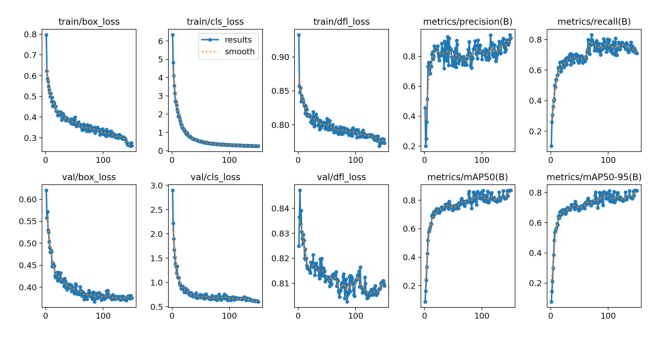

█████████████████████████████████ 100% | 5.71/5.71 MB [00:00<00:00, 17.12MB/s]: 


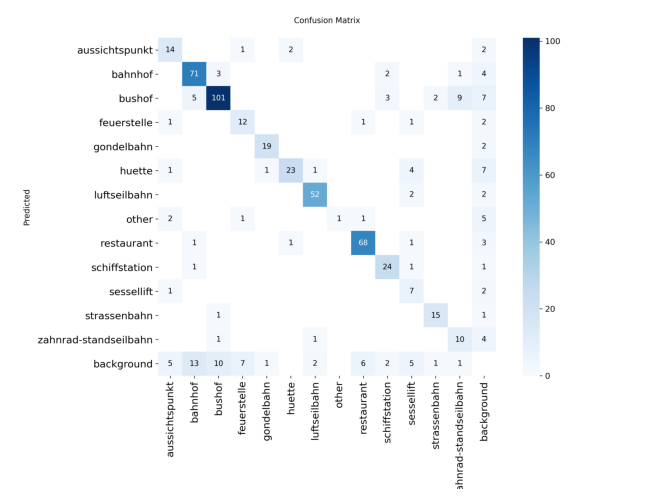

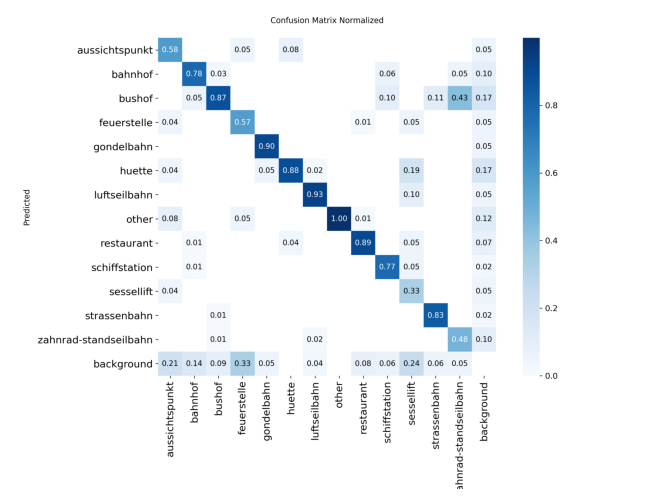

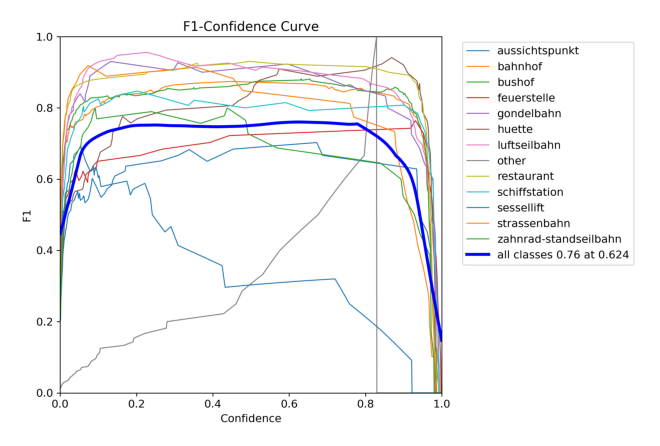

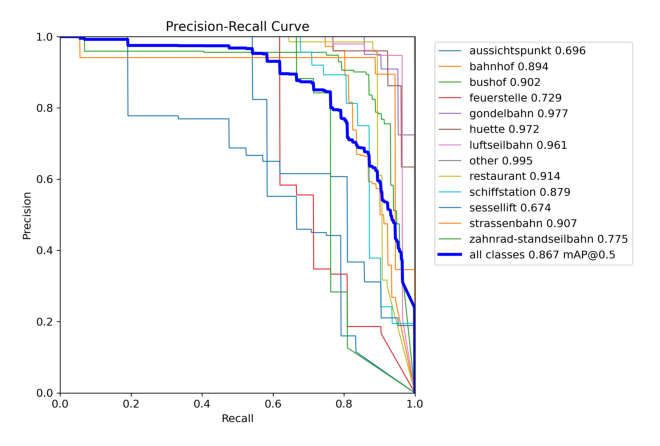

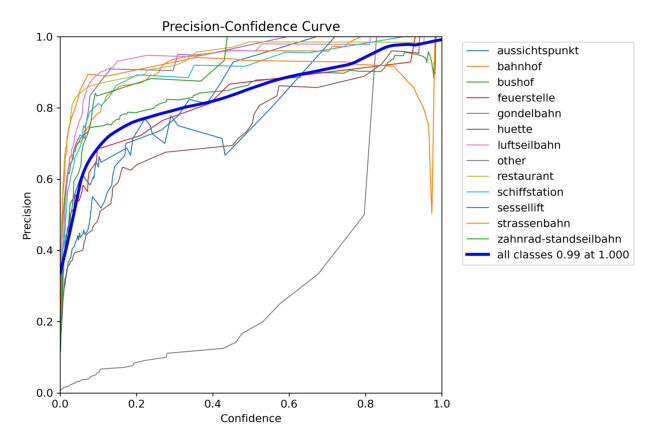

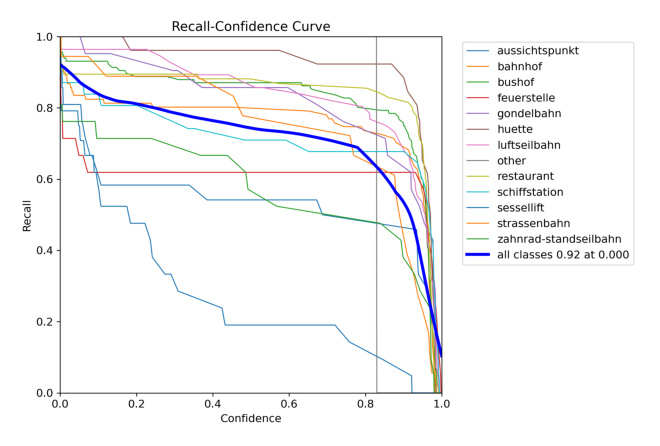

In [6]:
results = model.train(
    data="/content/drive/MyDrive/unitsol/datasets/yolo/usol_symbols_v0.yaml",
    epochs=150,
    batch=-1,
    imgsz=1280*2,
    classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    save_period=-1, # Frequency of saving model checkpoints, specified in epochs
    device=0,
    project='unitsol_symbols_v0',
    name='run4',  # name of the training run
    hsv_h=0.0,
    hsv_s=0.3,
    hsv_v=0.2,
    translate=0.0,
    scale=0.1,
    fliplr=1.0,
    mosaic=1.0,
    erasing=0.0,
    auto_augment= None,
)

Zip the output folder for download:

In [7]:
!zip -r /content/unitsol_symbols_v0/run4.zip /content/unitsol_symbols_v0/run4

from google.colab import files
files.download("/content/unitsol_symbols_v0/run4.zip")

  adding: content/unitsol_symbols_v0/run4/ (stored 0%)
  adding: content/unitsol_symbols_v0/run4/train_batch1.jpg (deflated 4%)
  adding: content/unitsol_symbols_v0/run4/val_batch2_labels.jpg (deflated 5%)
  adding: content/unitsol_symbols_v0/run4/train_batch19742.jpg (deflated 8%)
  adding: content/unitsol_symbols_v0/run4/train_batch0.jpg (deflated 11%)
  adding: content/unitsol_symbols_v0/run4/F1_curve.png (deflated 5%)
  adding: content/unitsol_symbols_v0/run4/weights/ (stored 0%)
  adding: content/unitsol_symbols_v0/run4/weights/last.pt (deflated 15%)
  adding: content/unitsol_symbols_v0/run4/weights/best.pt (deflated 15%)
  adding: content/unitsol_symbols_v0/run4/labels.jpg (deflated 27%)
  adding: content/unitsol_symbols_v0/run4/val_batch2_pred.jpg (deflated 5%)
  adding: content/unitsol_symbols_v0/run4/val_batch0_labels.jpg (deflated 9%)
  adding: content/unitsol_symbols_v0/run4/val_batch0_pred.jpg (deflated 9%)
  adding: content/unitsol_symbols_v0/run4/results.png (deflated 7%)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluate on validation set and export the model:

In [ ]:
results_val = model.val()  # evaluate model performance on the validation set
results_val = model.export(format='onnx')  # export the model to ONNX format